# Surface Weather Stations & Univariate Analysis

### Geography 531

### 01/28/2019

### By David Leifer

![alt text](xkcd.png "Title")

In [1]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_excel('ord_daily_weather.xlsx', sheet_name='Sheet1')


## Introduction

Climatic and weather data is routinely downloaded, scrapped, and processed as an original source of information to provide insights into spatial patterns of climatology. Although these data are gold standard of climatology, there are many processing issues that need to be addressed before conclusions can be drawn. Data cleaning and processing is needed to prepare this data for analysis. We downloaded Automated Surface Observing Systems (ASOS) weather data from January 1st 1948 until December 31st, 2018 from the Iowa Environmental Mesonet database on the station located at Chicago O’Hare. The data was then cleaned using data science techniques and the scripting language python in the Jupyter Notebook environment. Plots were drawn using built in libraries and analysis was conducted. We found a positive trend in the data indicating a slight warming pattern for this time period. Further work is required to expand the data from one dimension into higher dimensionality and include gridded coverage along a timeline.

In [3]:
df = df.replace(-99, None)

In [4]:
df = df.convert_objects(convert_numeric=True)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [5]:
df['avg_temp_f'] = df[['max_temp_f', 'min_temp_f']].mean(axis=1)
df['avg_dp_f'] = df[['max_dewpoint_f', 'min_dewpoint_f']].mean(axis=1)

## Methodology

Once the data was downloaded, the python package pandas was used to import the data and visualize the data in tabular form. The columns for station, day, max temperature, min temperature, max due point, and minimum due point were identified. The most insidious of values in a weather dataset are erroneous data values, which take the form of -99 or -999. It was thus necessary to remove these from our dataset and replace them with a moniker such as “NaN” or “none” using panda’s built in function “replace”. It was then required that the average temperature and dew point between max and min columns be calculated, which occurred using the .mean() function and creating a new column indicator in pandas. Since we are budding scientists and our data was in Fahrenheit, we converted all six of our columns into Celsius using a custom python function.

It was established that we can only use data for years that had enough non-missing data in the column. The threshold for this was created at 10%. If a year’s worth of days had less than 10% worth of data, the year was dropped completely from the data. This was accomplished using the .groupby() function of pandas for each variable and then merged together along the year column. For these years, we then calculated a mean for each of the six Celsius columns. We also decided to look at changes in extreme temperatures and dew points. This was completed using the 90th and 10th percentile quantiles for all the days from 1948 until 2018. We were required to find the days that exceeded the 90th percentile and fell below the 10th percentile.

Once the data was successfully processed and cleaned, it was time to start analyzing the data. Our primary research question was to what extent has the temperature and dewpoint changed over the past 70 years near Chicago. To accomplish this, we needed to decide on a univariate statistical test to apply to our newly cleaned data, each of which have their own positives and negatives. Since our data has only one variable, it should be straightforward to correctly summarize the data. The first univariate statistical test examined in class was the running mean or median. This is an easy to implement statistical test that calculates the mean of data points in successive, temporal order. The next test examined was the ordinary least squares linear regression (OLS). This test is the dependence of a single variable on an independent variable, in our case time. This measures the difference between a linear regression and the data provided, by minimizing the sum of squares error. It is often included with t-testing to discover the significance of the trend. The third method is the Theil-Sen trend estimator. This estimation is similar to OLS, however it estimates the regression using a median of the slope (rise over run). It is a non-parametric test, thus it does not assume normal distribution of the data. The final univariate test examined in class was the difference in time, which situates slices of the mean, median, and tails into time periods. We will use OLS to summarize our data because it is a simple yet powerful way to encapsulate data.

![alt text](xkcd2.png "Title")

In [7]:
def fahr_to_celsius(temp_fahr):
    """Convert Fahrenheit to Celsius
    
    Return Celsius conversion of input"""
    temp_celsius = (temp_fahr - 32) * 5 / 9
    return temp_celsius

In [8]:
df["max_temp_c"] = fahr_to_celsius(df["max_temp_f"])
df["min_temp_c"] = fahr_to_celsius(df["min_temp_f"])
df["max_dewpoint_c"] = fahr_to_celsius(df["max_dewpoint_f"])
df["min_dewpoint_c"] = fahr_to_celsius(df["min_dewpoint_f"])
df["avg_temp_c"] = fahr_to_celsius(df["avg_temp_f"])
df["avg_dp_c"] = fahr_to_celsius(df["avg_dp_f"])


In [9]:
df['day'] = pd.to_datetime(df['day'])

In [10]:
df[['year','month','day']] = df.day.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))
df.to_csv('df.csv', sep=',')

In [11]:
df2 = df.min_dewpoint_f.isnull().groupby([df['year']]).sum().astype(int).reset_index(name='min_dewpoint_f_count')


In [13]:
df2['min_dewpoint_f_percentage'] = ((df2['min_dewpoint_f_count']/365)*100)

In [15]:
df2.to_csv('years_greaterthan_ten.csv', sep=',')

In [16]:
threshold = df2[df2.min_dewpoint_f_percentage > 10]

In [17]:
threshold

,year,min_dewpoint_f_count,min_dewpoint_f_percentage
48,1996,366,100.273973
49,1997,365,100.000000
50,1998,365,100.000000
51,1999,365,100.000000
52,2000,53,14.520548


In [18]:
#df.to_csv('threshold.csv', sep=',')
#manually removed data for these years

In [19]:
df = pd.read_csv('threshold.csv')

In [21]:
#df = df.isna().sum()

In [68]:
#df

Unnamed: 0           0
station              0
day                  0
max_temp_f           3
min_temp_f           3
max_dewpoint_f       5
min_dewpoint_f    1517
avg_temp_f           3
avg_dp_f             3
max_temp_c           3
min_temp_c           3
max_dewpoint_c       5
min_dewpoint_c    1830
avg_temp_c           3
avg_dp_c             3
year                 0
month                0
dtype: int64

In [22]:
df3 = df.max_temp_c.groupby([df['year']]).mean().reset_index(name='max_temp_c_mean')
df4 = df.min_temp_c.groupby([df['year']]).mean().reset_index(name='min_temp_c_mean')
df5 = df.max_dewpoint_c.groupby([df['year']]).mean().reset_index(name='max_dewpoint_c_mean')
df6 = df.min_dewpoint_c.groupby([df['year']]).mean().reset_index(name='min_dewpoint_c_mean')
df7 = df.avg_temp_c.groupby([df['year']]).mean().reset_index(name='avg_temp_c_mean')
df8 = df.avg_dp_c.groupby([df['year']]).mean().reset_index(name='avg_dp_c_mean')


In [23]:
from functools import reduce
data_frames = [df3, df4, df5, df6, df7, df8]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['year'], how='outer'), data_frames)


## Results

There are multiple ways to calculate OLS, from using software packages like SPSS and ArcMap to rolling your own statistical test in a scripting language like Python or MATLAB. For the sake of brevity, we used a built-in Python package called statsmodels.api. The only requirements were to set the x and y variable as column subsets of our Pandas dataframe. Then with three simple lines, an OLS regression results table was produced for max temperature mean.

In [25]:
quantiles = df['max_temp_c'].quantile(q=[0.1,0.9])
quantiles

0.1    -1.111111
0.9    29.444444
Name: max_temp_c, dtype: float64

In [ ]:
criteria = df['max_temp_c'] < -1.111111
df_under = df[criteria]

In [30]:
df_under = df.max_temp_c.groupby([df['year']]).mean().reset_index(name='max_temp_c_mean')

In [31]:
from IPython.display import HTML, display
#https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

y = df_under["max_temp_c_mean"]
X = df_under["year"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        max_temp_c_mean   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.181e+04
Date:                Wed, 30 Jan 2019   Prob (F-statistic):           4.52e-89
Time:                        13:01:35   Log-Likelihood:                -87.938
No. Observations:                  71   AIC:                             177.9
Df Residuals:                      70   BIC:                             180.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year           0.0074   5.03e-05    147.683      0.000       0.007       0.008
==============================================================================
Omnibus:                        2.361   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.307   Jarque-Bera (JB):                1.611
Skew:                           0.305   Prob(JB):                        0.447
Kurtosis:                       3.415   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 3600x3600 with 0 Axes>

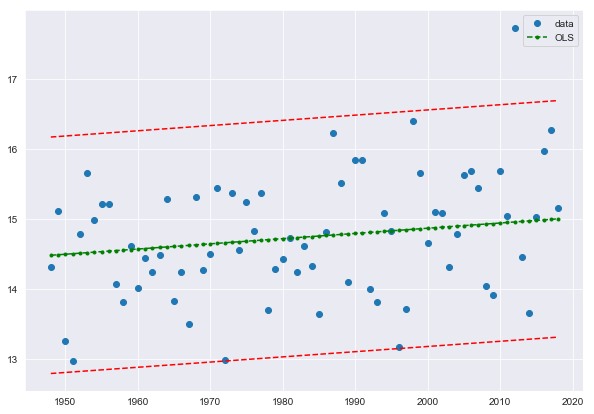

In [32]:
#https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/
fig = plt.figure(figsize=(50,50))
# predictor variable (x) and dependent variable (y)
y = df_merged["max_temp_c_mean"]
x = df_merged["year"]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, model.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');

In [ ]:
criteria2 = df['max_temp_c'] > 29.444444
df_over = df[criteria2]

In [35]:
df_over = df.max_temp_c.groupby([df['year']]).mean().reset_index(name='max_temp_c_mean')

In [36]:
y = df_over["max_temp_c_mean"]
X = df_over["year"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        max_temp_c_mean   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.181e+04
Date:                Wed, 30 Jan 2019   Prob (F-statistic):           4.52e-89
Time:                        13:14:55   Log-Likelihood:                -87.938
No. Observations:                  71   AIC:                             177.9
Df Residuals:                      70   BIC:                             180.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year           0.0074   5.03e-05    147.683      0.000       0.007       0.008
==============================================================================
Omnibus:                        2.361   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.307   Jarque-Bera (JB):                1.611
Skew:                           0.305   Prob(JB):                        0.447
Kurtosis:                       3.415   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 3600x3600 with 0 Axes>

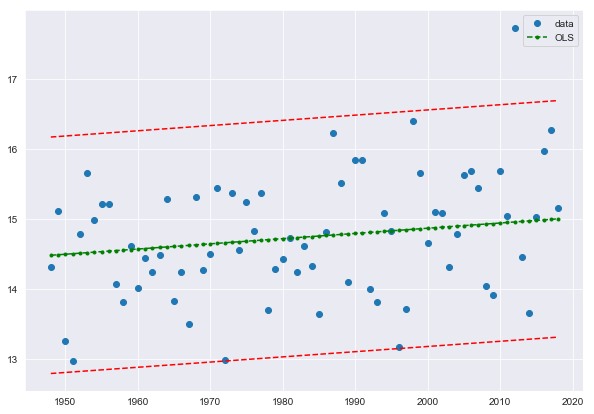

In [37]:
#https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/
fig = plt.figure(figsize=(50,50))
# predictor variable (x) and dependent variable (y)
y = df_over["max_temp_c_mean"]
x = df_over["year"]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, model.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');

In [38]:
quantiles = df['min_temp_c'].quantile(q=[0.1,0.9])
quantiles

0.1    -9.444444
0.9    18.888889
Name: min_temp_c, dtype: float64

In [39]:
criteria = df['min_temp_c'] < -9.444444
df_under = df[criteria]

In [41]:
df_under = df.min_temp_c.groupby([df['year']]).mean().reset_index(name='min_temp_c_mean')

In [42]:
y = df_under["min_temp_c_mean"]
X = df_under["year"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        min_temp_c_mean   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     1664.
Date:                Wed, 30 Jan 2019   Prob (F-statistic):           1.57e-50
Time:                        13:22:03   Log-Likelihood:                -101.98
No. Observations:                  71   AIC:                             206.0
Df Residuals:                      70   BIC:                             208.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year           0.0025   6.13e-05     40.794      0.000       0.002       0.003
==============================================================================
Omnibus:                        0.575   Durbin-Watson:                   1.151
Prob(Omnibus):                  0.750   Jarque-Bera (JB):                0.709
Skew:                           0.178   Prob(JB):                        0.702
Kurtosis:                       2.664   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 3600x3600 with 0 Axes>

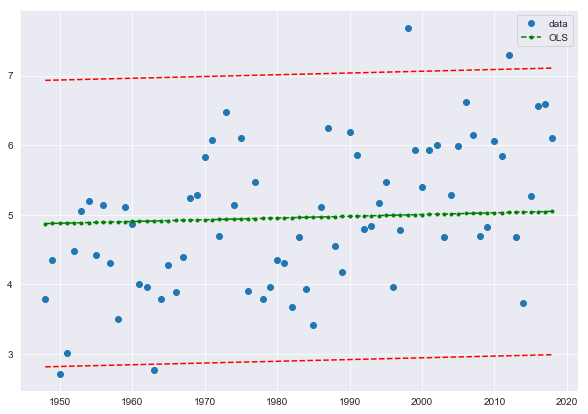

In [43]:
#https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/
fig = plt.figure(figsize=(50,50))
# predictor variable (x) and dependent variable (y)
y = df_under["min_temp_c_mean"]
x = df_under["year"]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, model.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');

In [44]:
criteria2 = df['min_temp_c'] > 18.888889
df_over = df_over[criteria2]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [45]:
df_over = df.min_temp_c.groupby([df['year']]).mean().reset_index(name='min_temp_c_mean')

In [46]:
y = df_over["min_temp_c_mean"]
X = df_over["year"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        min_temp_c_mean   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     1664.
Date:                Wed, 30 Jan 2019   Prob (F-statistic):           1.57e-50
Time:                        13:24:28   Log-Likelihood:                -101.98
No. Observations:                  71   AIC:                             206.0
Df Residuals:                      70   BIC:                             208.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year           0.0025   6.13e-05     40.794      0.000       0.002       0.003
==============================================================================
Omnibus:                        0.575   Durbin-Watson:                   1.151
Prob(Omnibus):                  0.750   Jarque-Bera (JB):                0.709
Skew:                           0.178   Prob(JB):                        0.702
Kurtosis:                       2.664   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 3600x3600 with 0 Axes>

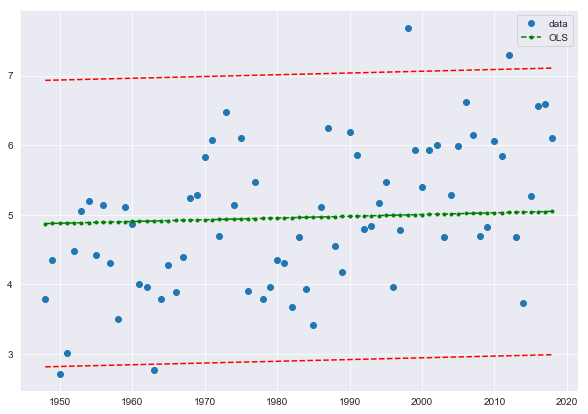

In [47]:
#https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/
fig = plt.figure(figsize=(50,50))
# predictor variable (x) and dependent variable (y)
y = df_over["min_temp_c_mean"]
x = df_over["year"]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, model.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');

In [28]:
quantiles = df['max_dewpoint_c'].quantile(q=[0.1,0.9])
quantiles

0.1    -5.600000
0.9    20.555556
Name: max_dewpoint_c, dtype: float64

In [48]:
criteria = df['max_dewpoint_c'] < -5.600000
df_under = df[criteria]

In [49]:
df_under = df.max_dewpoint_c.groupby([df['year']]).mean().reset_index(name='max_dewpoint_c_mean')


In [50]:
y = df_under["max_dewpoint_c_mean"]
X = df_under["year"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     max_dewpoint_c_mean   R-squared:                       0.988
Model:                             OLS   Adj. R-squared:                  0.988
Method:                  Least Squares   F-statistic:                     5999.
Date:                 Wed, 30 Jan 2019   Prob (F-statistic):           1.41e-69
Time:                         13:28:57   Log-Likelihood:                -84.912
No. Observations:                   71   AIC:                             171.8
Df Residuals:                       70   BIC:                             174.1
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year           0.0037   4.82e-05     77.455      0.000       0.004       0.004
==============================================================================
Omnibus:                        0.958   Durbin-Watson:                   1.480
Prob(Omnibus):                  0.619   Jarque-Bera (JB):                0.396
Skew:                          -0.029   Prob(JB):                        0.820
Kurtosis:                       3.361   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 3600x3600 with 0 Axes>

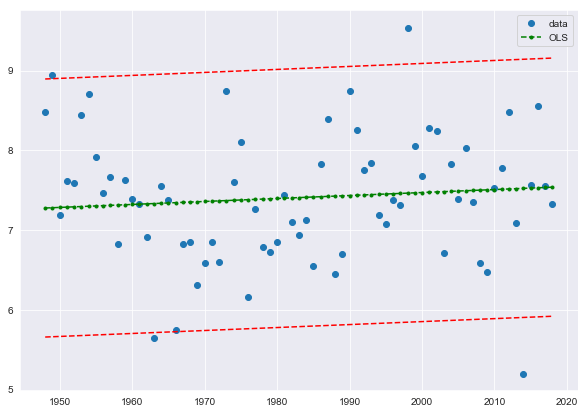

In [52]:
#https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/
fig = plt.figure(figsize=(50,50))
# predictor variable (x) and dependent variable (y)
y = df_under["max_dewpoint_c_mean"]
x = df_under["year"]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, model.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');

In [53]:
criteria2 = df['max_dewpoint_c'] > 20.555556
df_over = df_over[criteria2]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [54]:
df_over = df.max_dewpoint_c.groupby([df['year']]).mean().reset_index(name='max_dewpoint_c_mean')


In [55]:
y = df_over["max_dewpoint_c_mean"]
X = df_over["year"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     max_dewpoint_c_mean   R-squared:                       0.988
Model:                             OLS   Adj. R-squared:                  0.988
Method:                  Least Squares   F-statistic:                     5999.
Date:                 Wed, 30 Jan 2019   Prob (F-statistic):           1.41e-69
Time:                         13:32:03   Log-Likelihood:                -84.912
No. Observations:                   71   AIC:                             171.8
Df Residuals:                       70   BIC:                             174.1
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year           0.0037   4.82e-05     77.455      0.000       0.004       0.004
==============================================================================
Omnibus:                        0.958   Durbin-Watson:                   1.480
Prob(Omnibus):                  0.619   Jarque-Bera (JB):                0.396
Skew:                          -0.029   Prob(JB):                        0.820
Kurtosis:                       3.361   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 3600x3600 with 0 Axes>

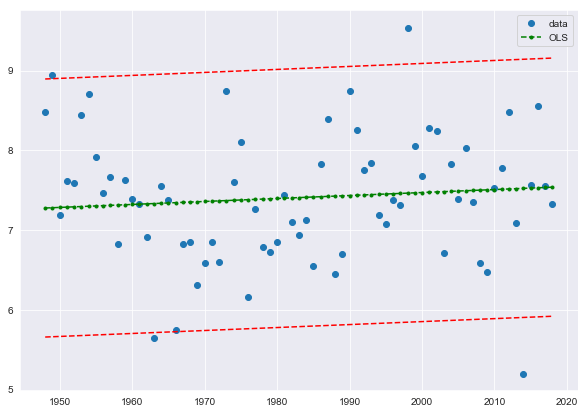

In [56]:
#https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/
fig = plt.figure(figsize=(50,50))
# predictor variable (x) and dependent variable (y)
y = df_over["max_dewpoint_c_mean"]
x = df_over["year"]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, model.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');

In [58]:
quantiles = df['min_dewpoint_c'].quantile(q=[0.1,0.9])
quantiles

0.1   -10.555556
0.9    19.444444
Name: min_dewpoint_c, dtype: float64

In [59]:
criteria = df['min_dewpoint_c'] < -10.555556
df_under = df[criteria]

In [60]:
df_under = df.min_dewpoint_c.groupby([df['year']]).mean().reset_index(name='min_dewpoint_c_mean')


In [61]:
y = df_under["min_dewpoint_c_mean"]
X = df_under["year"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     min_dewpoint_c_mean   R-squared:                         nan
Model:                             OLS   Adj. R-squared:                    nan
Method:                  Least Squares   F-statistic:                       nan
Date:                 Wed, 30 Jan 2019   Prob (F-statistic):                nan
Time:                         13:37:34   Log-Likelihood:                    nan
No. Observations:                   71   AIC:                               nan
Df Residuals:                       70   BIC:                               nan
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year              nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 3600x3600 with 0 Axes>

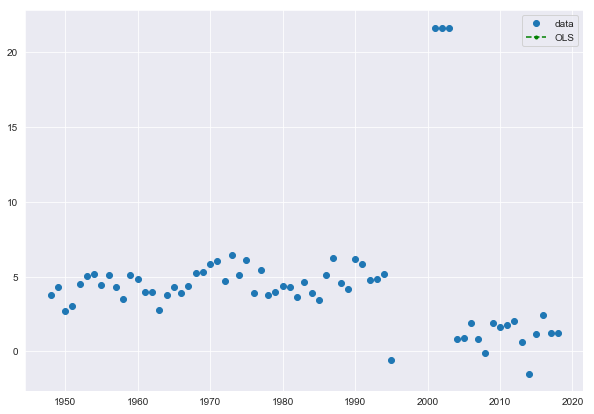

In [62]:
#https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/
fig = plt.figure(figsize=(50,50))
# predictor variable (x) and dependent variable (y)
y = df_under["min_dewpoint_c_mean"]
x = df_under["year"]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, model.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');

In [ ]:
criteria2 = df['min_dewpoint_c'] > 19.444444
df_over = df_over[criteria2]

In [32]:
df = df.dropna(axis = 0, how ='any') 

In [33]:
#df['Date'] = pd.to_datetime(df.assign(Day=1).loc[:, ['year','month','day']])

In [34]:
from IPython.display import HTML, display
#https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

y = df_merged["max_temp_c_mean"]
X = df_merged["year"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        max_temp_c_mean   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.181e+04
Date:                Wed, 30 Jan 2019   Prob (F-statistic):           4.52e-89
Time:                        12:16:29   Log-Likelihood:                -87.938
No. Observations:                  71   AIC:                             177.9
Df Residuals:                      70   BIC:                             180.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year           0.0074   5.03e-05    147.683      0.000       0.007       0.008
==============================================================================
Omnibus:                        2.361   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.307   Jarque-Bera (JB):                1.611
Skew:                           0.305   Prob(JB):                        0.447
Kurtosis:                       3.415   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 3600x3600 with 0 Axes>

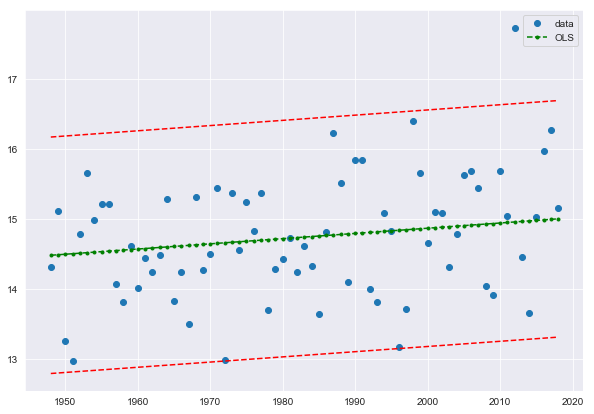

In [35]:
#https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/
fig = plt.figure(figsize=(50,50))
# predictor variable (x) and dependent variable (y)
y = df_merged["max_temp_c_mean"]
x = df_merged["year"]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, model.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');


In [36]:
y = df_merged["min_temp_c_mean"]
X = df_merged["year"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        min_temp_c_mean   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     1664.
Date:                Wed, 30 Jan 2019   Prob (F-statistic):           1.57e-50
Time:                        12:16:30   Log-Likelihood:                -101.98
No. Observations:                  71   AIC:                             206.0
Df Residuals:                      70   BIC:                             208.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year           0.0025   6.13e-05     40.794      0.000       0.002       0.003
==============================================================================
Omnibus:                        0.575   Durbin-Watson:                   1.151
Prob(Omnibus):                  0.750   Jarque-Bera (JB):                0.709
Skew:                           0.178   Prob(JB):                        0.702
Kurtosis:                       2.664   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 3600x3600 with 0 Axes>

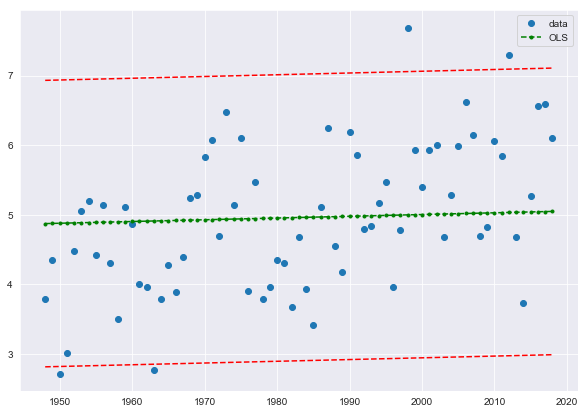

In [37]:
#https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/
fig = plt.figure(figsize=(50,50))
# predictor variable (x) and dependent variable (y)
y = df_merged["min_temp_c_mean"]
x = df_merged["year"]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, model.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');


In [38]:
y = df_merged["max_dewpoint_c_mean"]
X = df_merged["year"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     max_dewpoint_c_mean   R-squared:                       0.988
Model:                             OLS   Adj. R-squared:                  0.988
Method:                  Least Squares   F-statistic:                     5999.
Date:                 Wed, 30 Jan 2019   Prob (F-statistic):           1.41e-69
Time:                         12:16:30   Log-Likelihood:                -84.912
No. Observations:                   71   AIC:                             171.8
Df Residuals:                       70   BIC:                             174.1
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year           0.0037   4.82e-05     77.455      0.000       0.004       0.004
==============================================================================
Omnibus:                        0.958   Durbin-Watson:                   1.480
Prob(Omnibus):                  0.619   Jarque-Bera (JB):                0.396
Skew:                          -0.029   Prob(JB):                        0.820
Kurtosis:                       3.361   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 3600x3600 with 0 Axes>

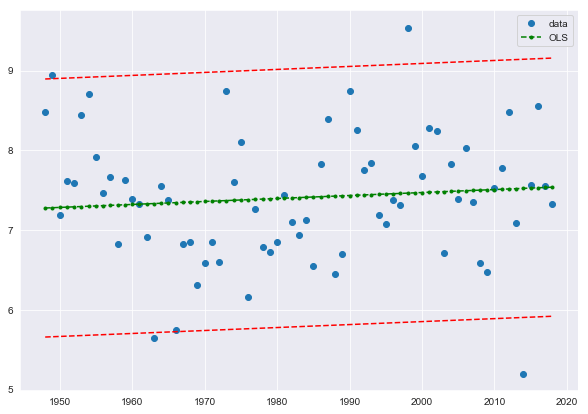

In [39]:
#https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/
fig = plt.figure(figsize=(50,50))
# predictor variable (x) and dependent variable (y)
y = df_merged["max_dewpoint_c_mean"]
x = df_merged["year"]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, model.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');


In [40]:
y = df_merged["min_dewpoint_c_mean"]
X = df_merged["year"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     min_dewpoint_c_mean   R-squared:                         nan
Model:                             OLS   Adj. R-squared:                    nan
Method:                  Least Squares   F-statistic:                       nan
Date:                 Wed, 30 Jan 2019   Prob (F-statistic):                nan
Time:                         12:16:31   Log-Likelihood:                    nan
No. Observations:                   71   AIC:                               nan
Df Residuals:                       70   BIC:                               nan
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year              nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 3600x3600 with 0 Axes>

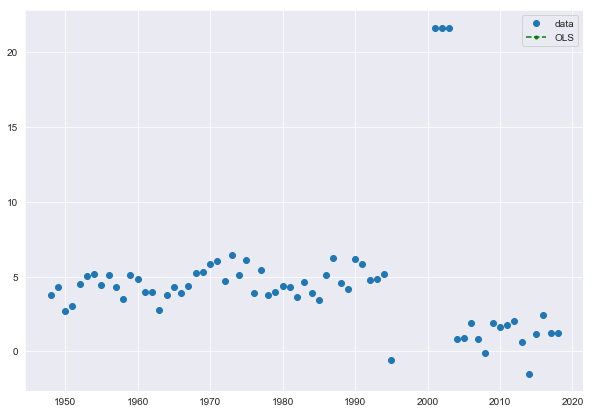

In [41]:
#https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/
fig = plt.figure(figsize=(50,50))
# predictor variable (x) and dependent variable (y)
y = df_merged["min_dewpoint_c_mean"]
x = df_merged["year"]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, model.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');

In [42]:
y = df_merged["avg_temp_c_mean"]
X = df_merged["year"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        avg_temp_c_mean   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     9177.
Date:                Wed, 30 Jan 2019   Prob (F-statistic):           5.61e-76
Time:                        12:16:31   Log-Likelihood:                -90.059
No. Observations:                  71   AIC:                             182.1
Df Residuals:                      70   BIC:                             184.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year           0.0050   5.18e-05     95.794      0.000       0.005       0.005
==============================================================================
Omnibus:                        2.072   Durbin-Watson:                   1.536
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.750
Skew:                           0.384   Prob(JB):                        0.417
Kurtosis:                       2.983   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 3600x3600 with 0 Axes>

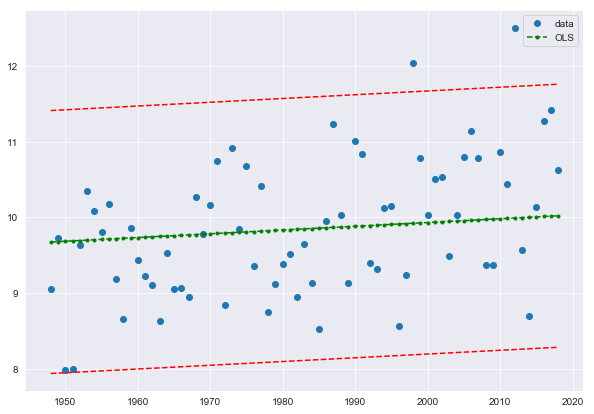

In [43]:
#https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/
fig = plt.figure(figsize=(50,50))
# predictor variable (x) and dependent variable (y)
y = df_merged["avg_temp_c_mean"]
x = df_merged["year"]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, model.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');

In [44]:
y = df_merged["avg_dp_c_mean"]
X = df_merged["year"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          avg_dp_c_mean   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     533.5
Date:                Wed, 30 Jan 2019   Prob (F-statistic):           1.82e-34
Time:                        12:16:32   Log-Likelihood:                -157.13
No. Observations:                  71   AIC:                             316.3
Df Residuals:                      70   BIC:                             318.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year           0.0031      0.000     23.097      0.000       0.003       0.003
==============================================================================
Omnibus:                       52.487   Durbin-Watson:                   0.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.083
Skew:                           2.283   Prob(JB):                     6.54e-46
Kurtosis:                      10.035   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 3600x3600 with 0 Axes>

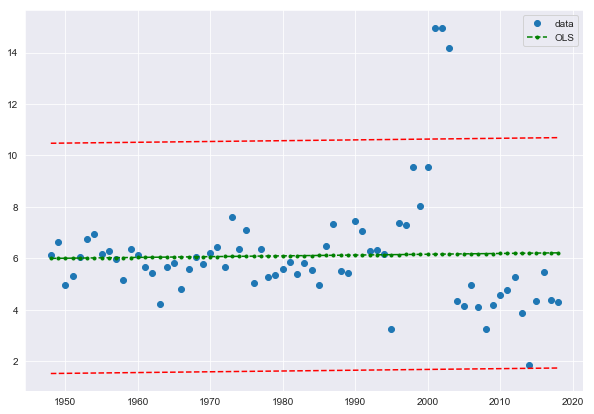

In [45]:
#https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/
fig = plt.figure(figsize=(50,50))
# predictor variable (x) and dependent variable (y)
y = df_merged["avg_dp_c_mean"]
x = df_merged["year"]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, model.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');

In [46]:
#df.to_csv('test.csv', sep=',')

## Conclusions

From these exercises, we were able to successfully clean data as a real meteorologist or climatologist would. We discovered an overall positive trend for maximum temperature, minimum temperature, and maximum dew point. Maximum temperature was more pronounced as a positive trendline and we had difficulty plotting the minimum dew point. For extreme weather, we also discovered a positive trendline for values that exceeded the 90th percentile and were less than the 10th percentile for maximum temperature, minimum temperature, and maximum dew point. We again had difficulty plotting the minimum dew point extreme values. This evidence supports the hypothesis that the Chicago O’Hare station is warming slightly over the past 70 years.

![alt text](Thats_all_folks.jpeg "Title")